In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import esmlab
#from ctsm_py import utils
#import segment as sg
import scipy                    
from scipy import signal
from scipy import stats
#import cf_units as cf

# some resources for plotting
import matplotlib.pyplot as plt
import cartopy
import cartopy.crs as ccrs
%matplotlib inline

from matplotlib.pyplot import figure
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

In [2]:
#CTSM
filedir_ssp = '/glade/derecho/scratch/brendanc/ARISE_GGCMI_CLM/SSP245'
filedir_sai = '/glade/derecho/scratch/brendanc/ARISE_GGCMI_CLM/SAI'

clm_ssp = xr.open_dataset(filedir_ssp + '/b.e21.BWSSP245cmip6.f09_g17.CMIP6-SSP2-4.5-WACCM.006.hcru_hcru_mt13.alpha-ctsm5.2.mksrf.23_ctsm5.1.dev171.GGCMIharm.clm2.h2.YIELD.2016-2069.nc')
clm_sai = xr.open_dataset(filedir_sai + '/b.e21.BW.f09_g17.SSP245-TSMLT-GAUSS-DEFAULT.006.hcru_hcru_mt13.alpha-ctsm5.2.mksrf.23_ctsm5.1.dev171.GGCMIharm.clm2.h2.YIELD.2036-2069.nc')

cornyield_clm_ssp = clm_ssp['yield'].sel(crops=0)
conarea_clm_ssp = clm_ssp['area'].sel(crops=0)
conarea_clm_ssp = conarea_clm_ssp * 100

cornyield_clm_sai = clm_sai['yield'].sel(crops=0)
conarea_clm_sai = clm_sai['area'].sel(crops=0)
conarea_clm_sai = conarea_clm_sai * 100

cornprod_clm_ssp = cornyield_clm_ssp * conarea_clm_ssp
cornprod_clm_ssp = cornprod_clm_ssp.sel(time=slice('2016','2068')) 
cornprod_clm_ssp_sum = cornprod_clm_ssp.sum(dim=['lat','lon'],skipna=True)

cornprod_clm_sai = cornyield_clm_sai * conarea_clm_sai
cornprod_clm_sai = cornprod_clm_sai.sel(time=slice('2036', '2068')) 
cornprod_clm_sai_sum = cornprod_clm_sai.sum(dim=['lat','lon'],skipna=True)

In [3]:
timessp = cornprod_clm_ssp['time'].values
timesai = cornprod_clm_sai['time'].values
lat = conarea_clm_ssp['lat'].values
lon = conarea_clm_ssp['lon'].values

In [4]:
filedir_area = '/glade/derecho/scratch/brendanc/archive/240509.b.e21.BWSSP245cmip6.f09_g17.CMIP6-SSP2-4.5-WACCM.006.radcase1.hcru_hcru_mt13.alpha-ctsm5.2.mksrf.23_ctsm5.1.dev171.GGCMIharm_2036-2045/lnd/hist'
area = xr.open_dataset(filedir_area + '/240509.b.e21.BWSSP245cmip6.f09_g17.CMIP6-SSP2-4.5-WACCM.006.radcase1.hcru_hcru_mt13.alpha-ctsm5.2.mksrf.23_ctsm5.1.dev171.GGCMIharm_2036-2045.clm2.h2.2036-01-01-00000.nc')
area = area.area
area = area * 100
filedir_maizefrac = '/glade/campaign/univ/urtg0006/Brendan/GGCMIinput_2015soc_0.5deg_5.2/landuse'
maizefrac = xr.open_dataset(filedir_maizefrac + '/landuse-15crops_2015soc_annual_2015_2100.shifted.nc',decode_times=False)
maizefrac_rain = maizefrac.maize_rainfed
maizefrac_irr = maizefrac.maize_irrigated
maizefrac = maizefrac_rain + maizefrac_irr
maizefrac = maizefrac.isel(lat=slice(None, None, -1))
maizefrac_2016_2068 = maizefrac.sel(time=slice(355.0, 407.0))
maizefrac_2015_2068 = maizefrac.sel(time=slice(354.0, 407.0))

In [5]:
maizefrac = maizefrac_2016_2068.values
maizefrac_newtime = xr.DataArray(maizefrac, coords={'time': timessp,'lat': lat, 'lon': lon},
             dims=['time', 'lat', 'lon'])

In [6]:
maize_area_tot_ssp = (maizefrac_newtime) * (area)
maize_area_tot_ssp = maize_area_tot_ssp.where(maize_area_tot_ssp > 10)
maize_area_tot_sai = maize_area_tot_ssp.sel(time=slice('2036','2068'))

In [7]:
savedir = '/glade/campaign/univ/urtg0006/Brendan/GGCMI_model_comp_figs'

In [8]:
#CTSM
filedir_ssp = '/glade/derecho/scratch/brendanc/ARISE_GGCMI_CLM/SSP245'
filedir_sai = '/glade/derecho/scratch/brendanc/ARISE_GGCMI_CLM/SAI'

clm_ssp = xr.open_dataset(filedir_ssp + '/b.e21.BWSSP245cmip6.f09_g17.CMIP6-SSP2-4.5-WACCM.006.hcru_hcru_mt13.alpha-ctsm5.2.mksrf.23_ctsm5.1.dev171.GGCMIharm.clm2.h2.YIELD.2016-2069.nc')
clm_sai = xr.open_dataset(filedir_sai + '/b.e21.BW.f09_g17.SSP245-TSMLT-GAUSS-DEFAULT.006.hcru_hcru_mt13.alpha-ctsm5.2.mksrf.23_ctsm5.1.dev171.GGCMIharm.clm2.h2.YIELD.2036-2069.nc')

cornyield_clm_ssp = clm_ssp['yield'].sel(crops=0)
conarea_clm_ssp = clm_ssp['area'].sel(crops=0)
conarea_clm_ssp = conarea_clm_ssp * 100

cornyield_clm_sai = clm_sai['yield'].sel(crops=0)
conarea_clm_sai = clm_sai['area'].sel(crops=0)
conarea_clm_sai = conarea_clm_sai * 100

cornyield_clm_ssp = cornyield_clm_ssp.sel(time=slice('2016','2068')) 
cornyield_clm_sai = cornyield_clm_sai.sel(time=slice('2036','2068')) 

cornprod_clm_ssp = cornyield_clm_ssp * maize_area_tot_ssp
cornprod_clm_ssp_sum = cornprod_clm_ssp.sum(dim=['lat','lon'],skipna=True)

cornprod_clm_sai = cornyield_clm_sai * maize_area_tot_sai
cornprod_clm_sai_sum = cornprod_clm_sai.sum(dim=['lat','lon'],skipna=True)

In [9]:
cornprod_clm_sai_sum = cornprod_clm_sai_sum / 1e6

In [10]:
cornprod_clm_ssp_sum = cornprod_clm_ssp_sum / 1e6

In [11]:
time_ssp = np.linspace(2016, 2069, 54)
time_sai = np.linspace(2036, 2069, 34)

In [12]:
time_ssp_lpj = np.arange(np.datetime64('2015-01-01').astype('datetime64[Y]'), np.datetime64('2069-01-01').astype('datetime64[Y]'))
time_sai_lpj = np.arange(np.datetime64('2035-01-01').astype('datetime64[Y]'), np.datetime64('2069-01-01').astype('datetime64[Y]'))

In [13]:
maizefrac_2015 = maizefrac_2015_2068.values
maizefrac_newtime_2015 = xr.DataArray(maizefrac_2015, coords={'time': time_ssp_lpj,'lat': lat, 'lon': lon},
             dims=['time', 'lat', 'lon'])

maize_area_tot_2015_ssp = (maizefrac_newtime_2015) * (area)
maize_area_tot_2015_ssp = maize_area_tot_2015_ssp.where(maize_area_tot_2015_ssp > 10)
maize_area_tot_2015_sai = maize_area_tot_2015_ssp.sel(time=slice('2035','2068'))

In [14]:
filedir3 = '/glade/p/univ/urtg0006/Brendan/GGCMI-output/lpj-guess/updated'
cornlpjssp_irr = xr.open_dataset(filedir3 + '/lpj-guess_CESM2-WACCM_raw_ssp245_2015soc_default_yield-mai-firr_global_annual_2015_2068_shifted.nc',decode_times=False)
cornlpjarise_irr = xr.open_dataset(filedir3 + '/lpj-guess_CESM2-WACCM_raw_arise1.5_2015soc_default_yield-mai-firr_global_annual_2035_2068_shifted.nc',decode_times=False)
cornlpjssp_irr = cornlpjssp_irr['yield-mai-firr']
cornlpjssp_irr = cornlpjssp_irr.isel(lat=slice(None, None, -1))
cornlpjarise_irr = cornlpjarise_irr['yield-mai-firr']
cornlpjarise_irr = cornlpjarise_irr.isel(lat=slice(None, None, -1))

cornlpjssp_noirr = xr.open_dataset(filedir3 + '/lpj-guess_CESM2-WACCM_raw_ssp245_2015soc_default_yield-mai-noirr_global_annual_2015_2068_shifted.nc',decode_times=False)
cornlpjarise_noirr = xr.open_dataset(filedir3 + '/lpj-guess_CESM2-WACCM_raw_arise1.5_2015soc_default_yield-mai-noirr_global_annual_2035_2068_shifted.nc',decode_times=False)
cornlpjssp_noirr = cornlpjssp_noirr['yield-mai-noirr']
cornlpjssp_noirr = cornlpjssp_noirr.isel(lat=slice(None, None, -1))
cornlpjarise_noirr = cornlpjarise_noirr['yield-mai-noirr']
cornlpjarise_noirr = cornlpjarise_noirr.isel(lat=slice(None, None, -1))

cornyieldlpjssp = cornlpjssp_noirr + cornlpjssp_irr
cornyieldlpjsai = cornlpjarise_noirr + cornlpjarise_irr

LPJSSPYIELD = cornyieldlpjssp.values
cornyield_lpj_ssp = xr.DataArray(LPJSSPYIELD, coords={'time': time_ssp_lpj,'lat': lat, 'lon': lon},
             dims=['time', 'lat', 'lon'])
LPJSAIYIELD = cornyieldlpjsai.values
cornyield_lpj_sai = xr.DataArray(LPJSAIYIELD, coords={'time': time_sai_lpj,'lat': lat, 'lon': lon},
             dims=['time', 'lat', 'lon'])

cornprod_lpj_ssp = cornyield_lpj_ssp * maize_area_tot_2015_ssp
cornprod_lpj_ssp = cornprod_lpj_ssp.sel(time=slice('2016', '2068'))
cornprod_lpj_ssp_sum = cornprod_lpj_ssp.sum(dim=['lat','lon'],skipna=True)

cornprod_lpj_sai = cornyield_lpj_sai * maize_area_tot_2015_sai
cornprod_lpj_sai = cornprod_lpj_sai.sel(time=slice('2036', '2068'))
cornprod_lpj_sai_sum = cornprod_lpj_sai.sum(dim=['lat','lon'],skipna=True)

In [15]:
cornprod_lpj_ssp_sum = cornprod_lpj_ssp_sum / 1e6

In [16]:
cornprod_lpj_sai_sum = cornprod_lpj_sai_sum / 1e6

In [17]:
filedir4 = '/glade/p/univ/urtg0006/Brendan/GGCMI-output/pdssat'
cornpdssatssp_noirr = xr.open_dataset(filedir4 + '/pdssat_cesm2-waccm_ssp245_nosdif_yield-mai-noirr_global_annual_2015_2068_shifted.nc',decode_times=False)
cornpdssatarise_noirr = xr.open_dataset(filedir4 + '/pdssat_cesm2-waccm_arise15_nosdif_yield-mai-noirr_global_annual_2035_2068_shifted.nc',decode_times=False)
cornpdssatssp_noirr = cornpdssatssp_noirr['yield-mai-noirr']
cornpdssatssp_noirr = cornpdssatssp_noirr.isel(lat=slice(None, None, -1))
cornpdssatarise_noirr = cornpdssatarise_noirr['yield-mai-noirr']
cornpdssatarise_noirr = cornpdssatarise_noirr.isel(lat=slice(None, None, -1))

cornpdssatssp_irr = xr.open_dataset(filedir4 + '/pdssat_cesm2-waccm_ssp245_nosdif_yield-mai-firr_global_annual_2015_2068_shifted.nc',decode_times=False)
cornpdssatarise_irr = xr.open_dataset(filedir4 + '/pdssat_cesm2-waccm_arise15_nosdif_yield-mai-firr_global_annual_2035_2068_shifted.nc',decode_times=False)
cornpdssatssp_irr = cornpdssatssp_irr['yield-mai-firr']
cornpdssatssp_irr = cornpdssatssp_irr.isel(lat=slice(None, None, -1))
cornpdssatarise_irr = cornpdssatarise_irr['yield-mai-firr']
cornpdssatarise_irr = cornpdssatarise_irr.isel(lat=slice(None, None, -1))

cornpdssatarise_sdif_irr = xr.open_dataset(filedir4 + '/pdssat_cesm2-waccm_arise15_sdif_yield-mai-firr_global_annual_2035_2068_shifted.nc',decode_times=False)
cornpdssatarise_sdif_irr = cornpdssatarise_sdif_irr['yield-mai-firr']
cornpdssatarise_sdif_irr = cornpdssatarise_sdif_irr.isel(lat=slice(None, None, -1))
cornpdssatarise_sdif_noirr = xr.open_dataset(filedir4 + '/pdssat_cesm2-waccm_arise15_sdif_yield-mai-noirr_global_annual_2035_2068_shifted.nc',decode_times=False)
cornpdssatarise_sdif_noirr = cornpdssatarise_sdif_noirr['yield-mai-noirr']
cornpdssatarise_sdif_noirr = cornpdssatarise_sdif_noirr.isel(lat=slice(None, None, -1))

cornpdssatssp_sdif_irr = xr.open_dataset(filedir4 + '/pdssat_cesm2-waccm_ssp245_sdif_yield-mai-firr_global_annual_2015_2068_shifted.nc',decode_times=False)
cornpdssatssp_sdif_irr = cornpdssatssp_sdif_irr['yield-mai-firr']
cornpdssatssp_sdif_irr = cornpdssatssp_sdif_irr.isel(lat=slice(None, None, -1))
cornpdssatssp_sdif_noirr = xr.open_dataset(filedir4 + '/pdssat_cesm2-waccm_ssp245_sdif_yield-mai-noirr_global_annual_2015_2068_shifted.nc',decode_times=False)
cornpdssatssp_sdif_noirr = cornpdssatssp_sdif_noirr['yield-mai-noirr']
cornpdssatssp_sdif_noirr = cornpdssatssp_sdif_noirr.isel(lat=slice(None, None, -1))

cornyieldpdssatssp = cornpdssatssp_irr + cornpdssatssp_noirr
cornyieldpdssatsai = cornpdssatarise_irr + cornpdssatarise_noirr

cornyieldpdssatsai_sdif = cornpdssatarise_sdif_irr + cornpdssatarise_sdif_noirr
cornyieldpdssatssp_sdif = cornpdssatssp_sdif_irr + cornpdssatssp_sdif_noirr

PDSSATSSPYIELD = cornyieldpdssatssp.values
cornyield_pdssat_ssp = xr.DataArray(PDSSATSSPYIELD, coords={'time': time_ssp_lpj,'lat': lat, 'lon': lon},
             dims=['time', 'lat', 'lon'])

PDSSATSAIYIELD = cornyieldpdssatsai.values
cornyield_pdssat_sai = xr.DataArray(PDSSATSAIYIELD, coords={'time': time_sai_lpj,'lat': lat, 'lon': lon},
             dims=['time', 'lat', 'lon'])

PDSSATSAISDIFYIELD = cornyieldpdssatsai_sdif.values
cornyield_pdssat_sai_sdif = xr.DataArray(PDSSATSAISDIFYIELD, coords={'time': time_sai_lpj,'lat': lat, 'lon': lon},
             dims=['time', 'lat', 'lon'])

PDSSATSSPSDIFYIELD = cornyieldpdssatssp_sdif.values
cornyield_pdssat_ssp_sdif = xr.DataArray(PDSSATSSPSDIFYIELD, coords={'time': time_ssp_lpj,'lat': lat, 'lon': lon},
             dims=['time', 'lat', 'lon'])

cornprod_pdssat_ssp = cornyield_pdssat_ssp * maize_area_tot_2015_ssp
cornprod_pdssat_ssp = cornprod_pdssat_ssp.sel(time=slice('2016', '2068'))
cornprod_pdssat_ssp_sum = cornprod_pdssat_ssp.sum(dim=['lat','lon'],skipna=True)

cornprod_pdssat_sai = cornyield_pdssat_sai * maize_area_tot_2015_sai
cornprod_pdssat_sai = cornprod_pdssat_sai.sel(time=slice('2036', '2068'))
cornprod_pdssat_sai_sum = cornprod_pdssat_sai.sum(dim=['lat','lon'],skipna=True)

cornyield_pdssat_sai_sdif = cornyield_pdssat_sai_sdif * maize_area_tot_2015_sai
cornyield_pdssat_sai_sdif = cornyield_pdssat_sai_sdif.sel(time=slice('2036', '2068'))
cornyield_pdssat_sai_sdif_sum = cornyield_pdssat_sai_sdif.sum(dim=['lat','lon'],skipna=True)

cornyield_pdssat_ssp_sdif = cornyield_pdssat_ssp_sdif * maize_area_tot_2015_ssp
cornyield_pdssat_ssp_sdif = cornyield_pdssat_ssp_sdif.sel(time=slice('2016', '2068'))
cornyield_pdssat_ssp_sdif_sum = cornyield_pdssat_ssp_sdif.sum(dim=['lat','lon'],skipna=True)

In [18]:
cornprod_pdssat_ssp_sum = cornprod_pdssat_ssp_sum / 1e6

In [19]:
cornprod_pdssat_sai_sum = cornprod_pdssat_sai_sum / 1e6

In [20]:
cornprod_pdssat_sai_sdif_sum = cornyield_pdssat_sai_sdif_sum / 1e6

In [21]:
cornprod_pdssat_ssp_sdif_sum = cornyield_pdssat_ssp_sdif_sum / 1e6

In [22]:
time_ssp = np.linspace(2016, 2068, 53)
time_sai = np.linspace(2036, 2068, 33)
time_sai_clm = np.linspace(2037, 2068, 32)

In [23]:
cornprod_clm_sai_sum = cornprod_clm_sai_sum[1:]

In [24]:
cornprod_clm_sai_sum

<xarray.DataArray (time: 32)>
array([725.849074, 723.045358, 728.263634, 699.611704, 750.358293, 733.537713,
       740.283846, 714.689703, 756.296318, 714.656316, 749.414466, 738.608319,
       725.388874, 734.14458 , 734.396986, 731.352535, 727.375446, 739.107599,
       753.406514, 723.255363, 728.923824, 716.98761 , 760.556859, 744.985222,
       730.186407, 753.397611, 737.146274, 751.531418, 731.740429, 712.595482,
       740.676628, 745.815942])
Coordinates:
    crops    float64 0.0
  * time     (time) datetime64[ns] 2037-01-01 2038-01-01 ... 2068-01-01
Attributes:
    units:    tonN/ha/yr

In [26]:
cornprod_pdssat_sai_sum_slice = cornprod_pdssat_sai_sum.sel(time=slice('2049','2068'))
cornprod_pdssat_sai_sum_slicem = cornprod_pdssat_sai_sum_slice.mean(dim='time')
cornprod_pdssat_ssp_sum_slice = cornprod_pdssat_ssp_sum.sel(time=slice('2049','2068'))
cornprod_pdssat_ssp_sum_slicem = cornprod_pdssat_ssp_sum_slice.mean(dim='time')

cornprod_lpj_sai_sum_slice = cornprod_lpj_sai_sum.sel(time=slice('2049','2068'))
cornprod_lpj_sai_sum_slicem = cornprod_lpj_sai_sum_slice.mean(dim='time')
cornprod_lpj_ssp_sum_slice = cornprod_lpj_ssp_sum.sel(time=slice('2049','2068'))
cornprod_lpj_ssp_sum_slicem = cornprod_lpj_ssp_sum_slice.mean(dim='time')

cornprod_clm_sai_sum_slice = cornprod_clm_sai_sum.sel(time=slice('2049','2068'))
cornprod_clm_sai_sum_slicem = cornprod_clm_sai_sum_slice.mean(dim='time')
cornprod_clm_ssp_sum_slice = cornprod_clm_ssp_sum.sel(time=slice('2049','2068'))
cornprod_clm_ssp_sum_slicem = cornprod_clm_ssp_sum_slice.mean(dim='time')

In [27]:
clm_pchange = ((cornprod_clm_sai_sum_slicem) - (cornprod_clm_ssp_sum_slicem)) / (cornprod_clm_ssp_sum_slicem)
clm_pchange = clm_pchange * 100
clm_pchange

<xarray.DataArray ()>
array(3.841935)
Coordinates:
    crops    float64 0.0
Attributes:
    units:    tonN/ha/yr

In [28]:
lpj_pchange = ((cornprod_lpj_sai_sum_slicem) - (cornprod_lpj_ssp_sum_slicem)) / (cornprod_lpj_ssp_sum_slicem)
lpj_pchange = lpj_pchange * 100
lpj_pchange

<xarray.DataArray ()>
array(-0.291733)

In [29]:
dsat_pchange = ((cornprod_pdssat_sai_sum_slicem) - (cornprod_pdssat_ssp_sum_slicem)) / (cornprod_pdssat_ssp_sum_slicem)
dsat_pchange = dsat_pchange * 100
dsat_pchange

<xarray.DataArray ()>
array(11.196288)

In [30]:
CLMref = cornprod_clm_ssp_sum.sel(time=slice('2016', '2035'))
CLMref = CLMref.mean(dim='time')

CLMssp = cornprod_clm_ssp_sum.sel(time=slice('2049', '2068'))
CLMssp = CLMssp.mean(dim='time')
CLMsai = cornprod_clm_sai_sum.sel(time=slice('2049', '2068'))
CLMsai = CLMsai.mean(dim='time')

CLMssp_pchange = (CLMssp - CLMref) / (CLMref)
CLMssp_pchange = CLMssp_pchange * 100

CLMsai_pchange = (CLMsai - CLMref) / (CLMref)
CLMsai_pchange = CLMsai_pchange * 100

In [31]:
CLMssp_2049 = cornprod_clm_ssp_sum.sel(time=slice('2049', '2058'))
CLMssp_2049 = CLMssp_2049.mean(dim='time')
CLMsai_2049 = cornprod_clm_sai_sum.sel(time=slice('2049', '2058'))
CLMsai_2049 = CLMsai_2049.mean(dim='time')

CLMssp_pchange_2049 = (CLMssp_2049 - CLMref) / (CLMref)
CLMssp_pchange_2049 = CLMssp_pchange_2049 * 100

CLMsai_pchange_2049 = (CLMsai_2049 - CLMref) / (CLMref)
CLMsai_pchange_2049 = CLMsai_pchange_2049 * 100

In [32]:
LPJref = cornprod_lpj_ssp_sum.sel(time=slice('2016', '2035'))
LPJref = LPJref.mean(dim='time')

LPJssp = cornprod_lpj_ssp_sum.sel(time=slice('2049', '2068'))
LPJssp = LPJssp.mean(dim='time')
LPJsai = cornprod_lpj_sai_sum.sel(time=slice('2049', '2068'))
LPJsai = LPJsai.mean(dim='time')

LPJssp_pchange = (LPJssp - LPJref) / (LPJref)
LPJssp_pchange = LPJssp_pchange * 100

LPJsai_pchange = (LPJsai - LPJref) / (LPJref)
LPJsai_pchange = LPJsai_pchange * 100

In [33]:
LPJssp_2049 = cornprod_lpj_ssp_sum.sel(time=slice('2049', '2058'))
LPJssp_2049 = LPJssp_2049.mean(dim='time')
LPJsai_2049 = cornprod_lpj_sai_sum.sel(time=slice('2049', '2058'))
LPJsai_2049 = LPJsai_2049.mean(dim='time')

LPJssp_pchange_2049 = (LPJssp_2049 - LPJref) / (LPJref)
LPJssp_pchange_2049 = LPJssp_pchange_2049 * 100

LPJsai_pchange_2049 = (LPJsai_2049 - LPJref) / (LPJref)
LPJsai_pchange_2049 = LPJsai_pchange_2049 * 100

In [34]:
DSATref = cornprod_pdssat_ssp_sum.sel(time=slice('2016', '2025'))
DSATref = DSATref.mean(dim='time')

DSATref_sdif = cornprod_pdssat_ssp_sdif_sum.sel(time=slice('2016', '2035'))
DSATref_sdif = DSATref_sdif.mean(dim='time')

DSATssp = cornprod_pdssat_ssp_sum.sel(time=slice('2059', '2068'))
DSATssp = DSATssp.mean(dim='time')
DSATssp_sdif = cornprod_pdssat_ssp_sdif_sum.sel(time=slice('2049', '2068'))
DSATssp_sdif = DSATssp_sdif.mean(dim='time')
DSATsai = cornprod_pdssat_sai_sum.sel(time=slice('2059', '2068'))
DSATsai = DSATsai.mean(dim='time')


DSATssp_pchange = (DSATssp - DSATref) / (DSATref)
DSATssp_pchange = DSATssp_pchange * 100

DSATssp_sdif_pchange = (DSATssp_sdif - DSATref_sdif) / (DSATref_sdif)
DSATssp_sdif_pchange = DSATssp_sdif_pchange * 100

DSATsai_pchange = (DSATsai - DSATref) / (DSATref)
DSATsai_pchange = DSATsai_pchange * 100

DSATsai_sdif = cornprod_pdssat_sai_sdif_sum.sel(time=slice('2049', '2068'))
DSATsai_sdif = DSATsai_sdif.mean(dim='time')
DSATsai_sdif_pchange = (DSATsai_sdif - DSATref_sdif) / (DSATref_sdif)
DSATsai_sdif_pchange = DSATsai_sdif_pchange * 100

In [35]:
DSATssp_sdif_2049 = cornprod_pdssat_ssp_sdif_sum.sel(time=slice('2049', '2058'))
DSATssp_sdif_2049 = DSATssp_sdif_2049.mean(dim='time')

DSATssp_sdif_pchange_2049 = (DSATssp_sdif_2049 - DSATref_sdif) / (DSATref_sdif)
DSATssp_sdif_pchange_2049 = DSATssp_sdif_pchange_2049 * 100

DSATsai_sdif_2049 = cornprod_pdssat_sai_sdif_sum.sel(time=slice('2049', '2058'))
DSATsai_sdif_2049 = DSATsai_sdif_2049.mean(dim='time')

DSATsai_sdif_pchange_2049 = (DSATsai_sdif_2049 - DSATref_sdif) / (DSATref_sdif)
DSATsai_sdif_pchange_2049 = DSATsai_sdif_pchange_2049 * 100

In [36]:
CLMssp_pchange

<xarray.DataArray ()>
array(-0.947103)
Coordinates:
    crops    float64 0.0
Attributes:
    units:    tonN/ha/yr

In [37]:
CLMsai_pchange

<xarray.DataArray ()>
array(2.858445)
Coordinates:
    crops    float64 0.0
Attributes:
    units:    tonN/ha/yr

In [38]:
LPJssp_pchange

<xarray.DataArray ()>
array(0.542026)

In [39]:
LPJsai_pchange

<xarray.DataArray ()>
array(0.248711)

In [40]:
DSATssp_pchange

<xarray.DataArray ()>
array(-25.562149)

In [41]:
DSATsai_pchange

<xarray.DataArray ()>
array(-13.652781)

In [42]:
N = 3
ind = np.arange(N)
barWidth = 0.1

In [43]:
SSP = [CLMssp_pchange, LPJssp_pchange, DSATssp_pchange]
SAI = [CLMsai_pchange, LPJsai_pchange, DSATsai_pchange]

In [45]:
SSP = np.array([CLMssp_pchange, LPJssp_pchange, DSATssp_sdif_pchange])
SAI = np.array([CLMsai_pchange, LPJsai_pchange, DSATsai_sdif_pchange])

SSP_2049 = np.array([CLMssp_pchange_2049, LPJssp_pchange_2049, DSATssp_sdif_pchange_2049])
SAI_2049 = np.array([CLMsai_pchange_2049, LPJsai_pchange_2049, DSATsai_sdif_pchange_2049])

In [46]:
SSP

array([ -0.94710267,   0.54202611, -19.40643489])

In [47]:
CLMrefts = cornprod_clm_ssp_sum.sel(time=slice('2016', '2035'))
CLMrefts = CLMrefts.values
CLMsspts = cornprod_clm_ssp_sum.sel(time=slice('2049', '2068'))
CLMsspts = CLMsspts.values
CLMsaits = cornprod_clm_sai_sum.sel(time=slice('2049', '2068'))
CLMsaits = CLMsaits.values
CLMssp_pchange_ts = (CLMsspts - CLMrefts) / (CLMrefts)
CLMssp_pchange_ts = CLMssp_pchange_ts * 100

CLMsai_pchange_ts = (CLMsaits - CLMrefts) / (CLMrefts)
CLMsai_pchange_ts = CLMsai_pchange_ts * 100

LPJrefts = cornprod_lpj_ssp_sum.sel(time=slice('2016', '2035'))
LPJrefts = LPJrefts.values
LPJsspts = cornprod_lpj_ssp_sum.sel(time=slice('2049', '2068'))
LPJsspts = LPJsspts.values
LPJsaits = cornprod_lpj_sai_sum.sel(time=slice('2049', '2068'))
LPJsaits = LPJsaits.values

LPJssp_pchange_ts = (LPJsspts - LPJrefts) / (LPJrefts)
LPJssp_pchange_ts = LPJssp_pchange_ts * 100

LPJsai_pchange_ts = (LPJsaits - LPJrefts) / (LPJrefts)
LPJsai_pchange_ts = LPJsai_pchange_ts * 100



DSATref_sdifts = cornprod_pdssat_ssp_sdif_sum.sel(time=slice('2016', '2035'))
DSATref_sdifts = DSATref_sdifts.values
DSATssp_sdifts = cornprod_pdssat_ssp_sdif_sum.sel(time=slice('2049', '2068'))
DSATssp_sdifts = DSATssp_sdifts.values
DSATsai_sdifts = cornprod_pdssat_sai_sdif_sum.sel(time=slice('2049', '2068'))
DSATsai_sdifts = DSATsai_sdifts.values

DSATssp_sdif_pchange_ts = (DSATssp_sdifts - DSATref_sdifts) / (DSATref_sdifts)
DSATssp_sdif_pchange_ts = DSATssp_sdif_pchange_ts * 100

DSATsai_sdif_pchange_ts = (DSATsai_sdifts - DSATref_sdifts) / (DSATref_sdifts)
DSATsai_sdif_pchange_ts = DSATsai_sdif_pchange_ts * 100

In [48]:
CLMsspts_2049 = cornprod_clm_ssp_sum.sel(time=slice('2049', '2068'))
CLMsspts_2049 = CLMsspts_2049.values
CLMsaits_2049 = cornprod_clm_sai_sum.sel(time=slice('2049', '2068'))
CLMsaits_2049 = CLMsaits_2049.values
CLMssp_pchange_ts_2049 = (CLMsspts_2049 - CLMrefts) / (CLMrefts)
CLMssp_pchange_ts_2049 = CLMssp_pchange_ts_2049 * 100

CLMsai_pchange_ts_2049 = (CLMsaits_2049 - CLMrefts) / (CLMrefts)
CLMsai_pchange_ts_2049 = CLMsai_pchange_ts_2049 * 100

LPJsspts_2049 = cornprod_lpj_ssp_sum.sel(time=slice('2049', '2068'))
LPJsspts_2049 = LPJsspts_2049.values
LPJsaits_2049 = cornprod_lpj_sai_sum.sel(time=slice('2049', '2068'))
LPJsaits_2049 = LPJsaits_2049.values

LPJssp_pchange_ts_2049 = (LPJsspts_2049 - LPJrefts) / (LPJrefts)
LPJssp_pchange_ts_2049 = LPJssp_pchange_ts_2049 * 100

LPJsai_pchange_ts_2049 = (LPJsaits_2049 - LPJrefts) / (LPJrefts)
LPJsai_pchange_ts_2049 = LPJsai_pchange_ts_2049 * 100

DSATssp_sdifts_2049 = cornprod_pdssat_ssp_sdif_sum.sel(time=slice('2049', '2068'))
DSATssp_sdifts_2049 = DSATssp_sdifts_2049.values
DSATsai_sdifts_2049 = cornprod_pdssat_sai_sdif_sum.sel(time=slice('2049', '2068'))
DSATsai_sdifts_2049 = DSATsai_sdifts_2049.values

DSATssp_sdif_pchange_ts_2049 = (DSATssp_sdifts_2049 - DSATref_sdifts) / (DSATref_sdifts)
DSATssp_sdif_pchange_ts_2049 = DSATssp_sdif_pchange_ts_2049 * 100

DSATsai_sdif_pchange_ts_2049 = (DSATsai_sdifts_2049 - DSATref_sdifts) / (DSATref_sdifts)
DSATsai_sdif_pchange_ts_2049 = DSATsai_sdif_pchange_ts_2049 * 100

In [49]:
CLMrefts

array([777.27655001, 742.9088275 , 698.60911615, 737.12737975,
       712.72231128, 702.76523848, 690.99146675, 709.32135904,
       708.99650223, 669.16094834, 727.82702554, 734.99086648,
       704.8549639 , 730.14993407, 692.28520001, 719.41936189,
       713.47519847, 722.19649389, 727.56639071, 691.17381608])

In [50]:
clmssp_upper_quartile = np.percentile(CLMssp_pchange_ts, 75)
clmssp_lower_quartile = np.percentile(CLMssp_pchange_ts, 25)

clmsai_upper_quartile = np.percentile(CLMsai_pchange_ts, 75)
clmsai_lower_quartile = np.percentile(CLMsai_pchange_ts, 25)

lpjssp_upper_quartile = np.percentile(LPJssp_pchange_ts, 75)
lpjssp_lower_quartile = np.percentile(LPJssp_pchange_ts, 25)

lpjsai_upper_quartile = np.percentile(LPJsai_pchange_ts, 75)
lpjsai_lower_quartile = np.percentile(LPJsai_pchange_ts, 25)

dsatssp_upper_quartile = np.percentile(DSATssp_sdif_pchange_ts, 75)
dsatssp_lower_quartile = np.percentile(DSATssp_sdif_pchange_ts, 25)

dsatsai_upper_quartile = np.percentile(DSATsai_sdif_pchange_ts, 75)
dsatsai_lower_quartile = np.percentile(DSATsai_sdif_pchange_ts, 25)

In [51]:
clmssp_upper_quartile_2049 = np.percentile(CLMssp_pchange_ts_2049, 75)
clmssp_lower_quartile_2049 = np.percentile(CLMssp_pchange_ts_2049, 25)

clmsai_upper_quartile_2049 = np.percentile(CLMsai_pchange_ts_2049, 75)
clmsai_lower_quartile_2049 = np.percentile(CLMsai_pchange_ts_2049, 25)

lpjssp_upper_quartile_2049 = np.percentile(LPJssp_pchange_ts_2049, 75)
lpjssp_lower_quartile_2049 = np.percentile(LPJssp_pchange_ts_2049, 25)

lpjsai_upper_quartile_2049 = np.percentile(LPJsai_pchange_ts_2049, 75)
lpjsai_lower_quartile_2049 = np.percentile(LPJsai_pchange_ts_2049, 25)

dsatssp_upper_quartile_2049 = np.percentile(DSATssp_sdif_pchange_ts_2049, 75)
dsatssp_lower_quartile_2049 = np.percentile(DSATssp_sdif_pchange_ts_2049, 25)

dsatsai_upper_quartile_2049 = np.percentile(DSATsai_sdif_pchange_ts_2049, 75)
dsatsai_lower_quartile_2049 = np.percentile(DSATsai_sdif_pchange_ts_2049, 25)

In [52]:
LPJsai_pchange_ts_2049

array([ 0.22149765, -3.8329825 , -0.81763333, -7.361202  ,  2.6708574 ,
        0.9032826 ,  0.4210863 ,  0.2425191 ,  0.64971787,  1.622344  ,
        0.17868835,  0.2587732 ,  3.2248318 ,  1.25655   ,  0.9167875 ,
        3.8689737 , -1.5387663 ,  0.43090117,  0.7176899 ,  1.7521021 ],
      dtype=float32)

In [53]:
LPJssp_pchange_ts_2049

array([-0.01044649, -6.825091  , -2.5828085 , -6.5721064 ,  3.1916227 ,
        1.4470265 , -0.47060597,  3.720604  ,  2.8813207 ,  2.0580416 ,
       -0.5202529 , -0.54993755,  0.25207287,  2.7252815 ,  3.5143251 ,
       -0.18750423,  2.7527375 ,  4.3620477 ,  0.9289013 ,  1.8103411 ],
      dtype=float32)

In [54]:
min_ssp = np.array([clmssp_lower_quartile, lpjssp_lower_quartile, dsatssp_lower_quartile])
max_ssp = np.array([clmssp_upper_quartile, lpjssp_upper_quartile, dsatssp_upper_quartile])

min_sai = np.array([clmsai_lower_quartile, lpjsai_lower_quartile, dsatsai_lower_quartile])
max_sai = np.array([clmsai_upper_quartile, lpjsai_upper_quartile, dsatsai_upper_quartile])

In [55]:
min_ssp_2049 = np.array([clmssp_lower_quartile_2049, lpjssp_lower_quartile_2049, dsatssp_lower_quartile_2049])
max_ssp_2049 = np.array([clmssp_upper_quartile_2049, lpjssp_upper_quartile_2049, dsatssp_upper_quartile_2049])

min_sai_2049 = np.array([clmsai_lower_quartile_2049, lpjsai_lower_quartile_2049, dsatsai_lower_quartile_2049])
max_sai_2049 = np.array([clmsai_upper_quartile_2049, lpjsai_upper_quartile_2049, dsatsai_upper_quartile_2049])

In [56]:
min_ssp = SSP - min_ssp
max_ssp = max_ssp - SSP
min_sai = SAI - min_sai
max_sai = max_sai - SAI

In [57]:
min_ssp_2049 = SSP_2049 - min_ssp_2049
max_ssp_2049 = max_ssp_2049 - SSP_2049
min_sai_2049 = SAI_2049 - min_sai_2049
max_sai_2049 = max_sai_2049 - SAI_2049

In [58]:
SSP_2049

array([ -0.32603032,   0.24819085, -16.16006941])

In [60]:
SSP

array([ -0.94710267,   0.54202611, -19.40643489])

In [61]:
min_ssp_2049

NameError: name 'min_ssp_2049' is not defined

In [62]:
max_ssp_2049

NameError: name 'max_ssp_2049' is not defined

In [92]:
N = 3
ind = np.arange(N)
barWidth = 0.25

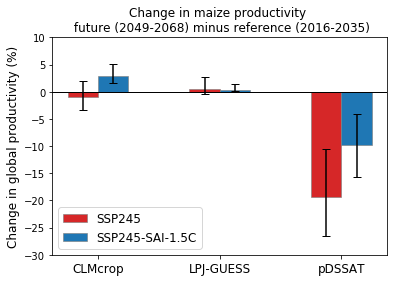

In [103]:
fig = plt.subplots(figsize =(6, 4))
#plt.grid(linewidth=0.6, zorder=0)
plt.bar(ind, SSP, width = barWidth, color ='tab:red',
        edgecolor ='grey', linewidth=0.6, label ='SSP245', zorder=2)
plt.errorbar(ind, SSP, yerr=(min_ssp, max_ssp), fmt='o',marker='None', ecolor='black',elinewidth=1.5,capsize=4,zorder=3)

plt.bar(ind + barWidth, SAI, color ='tab:blue', width = barWidth,
        edgecolor ='grey',linewidth=0.6, label ='SSP245-SAI-1.5C', zorder=2)
plt.errorbar(ind + barWidth, SAI, yerr=(min_sai, max_sai), fmt='o',marker='None', ecolor='black',elinewidth=1.5,capsize=4,zorder=3)

plt.xticks(ind + barWidth / 2, ('CLMcrop', 'LPJ-GUESS', 'pDSSAT'),fontsize=12)
plt.axhline(y=0, color='k', linestyle='-',linewidth=1)
plt.ylabel("Change in global productivity (%)",fontsize=12)
plt.legend(loc="lower left", ncol=1, prop={'size': 12})
plt.ylim([-30,10])
plt.title('Change in maize productivity \n future (2049-2068) minus reference (2016-2035)',fontsize=12, y=0.99999999999999999999)
plt.savefig(savedir+'/Fig2_JJ.png', dpi = 600, bbox_inches = 'tight', pad_inches = 0.05 )

In [104]:
cornprod_clm_ssp_sum_split = cornprod_clm_ssp_sum[21:]
clm_time_pchange = (cornprod_clm_sai_sum - cornprod_clm_ssp_sum_split) / (cornprod_clm_ssp_sum_split)
clm_time_pchange = clm_time_pchange * 100

In [105]:
cornprod_lpj_ssp_sum_split = cornprod_lpj_ssp_sum[20:]
lpj_time_pchange = (cornprod_lpj_sai_sum - cornprod_lpj_ssp_sum_split) / (cornprod_lpj_ssp_sum_split)
lpj_time_pchange = lpj_time_pchange * 100


In [106]:
cornprod_pdssat_ssp_sum_split = cornprod_pdssat_ssp_sum[20:]
pdssat_time_pchange = (cornprod_pdssat_sai_sum - cornprod_pdssat_ssp_sum_split) / (cornprod_pdssat_ssp_sum_split)
pdssat_time_pchange = pdssat_time_pchange * 100
pdssat_time_pchange

<xarray.DataArray (time: 33)>
array([ -2.595366,   2.096765,   3.75946 , -22.519192,  -0.693647,  -1.389707,
        -9.908969,  15.403788,  -4.608324,   5.628335, -10.084766,  18.8017  ,
       -17.796333,   0.631106,  19.205624,   6.020776,  13.895377,   1.406846,
        11.517298,  14.481997,   6.448296,   2.787534,  -7.336905,  33.75257 ,
        46.18422 ,  31.149715,  12.080198,   8.753536,  20.608335,  -3.730116,
         4.35779 ,  17.497936,  -2.424571], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2036-01-01 2037-01-01 ... 2068-01-01

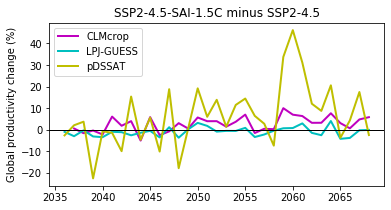

In [107]:
fig = plt.figure()
fig.set_size_inches(6,3)
plt.plot(time_sai_clm,clm_time_pchange,linewidth=2,color='m',label="CLMcrop")
plt.plot(time_sai,lpj_time_pchange,linewidth=2,color='c',label="LPJ-GUESS")
plt.plot(time_sai,pdssat_time_pchange,linewidth=2,color='y',label="pDSSAT")
plt.legend(loc="upper left", ncol=1, prop={'size': 10})
plt.ylabel("Global productivity change (%)",fontsize=10)
plt.title('SSP2-4.5-SAI-1.5C minus SSP2-4.5')
plt.axhline(y=0, color='k', linestyle='-',linewidth=1)
#plt.savefig(savedir+'/3model_timeseries_pchange.pdf', dpi = 600, bbox_inches = 'tight', pad_inches = 0.05 )

In [108]:
CLMref = cornprod_clm_ssp_sum.sel(time=slice('2016', '2035'))
CLMref = CLMref.mean(dim='time')

CLMssp = cornprod_clm_ssp_sum.sel(time=slice('2036', '2068'))
CLMsai = cornprod_clm_sai_sum.sel(time=slice('2036', '2068'))

CLMssp_pchange = (CLMssp - CLMref) / (CLMref)
CLMssp_pchange = CLMssp_pchange * 100

CLMsai_pchange = (CLMsai - CLMref) / (CLMref)
CLMsai_pchange = CLMsai_pchange * 100

LPJref = cornprod_lpj_ssp_sum.sel(time=slice('2016', '2035'))
LPJref = LPJref.mean(dim='time')

LPJssp = cornprod_lpj_ssp_sum.sel(time=slice('2036', '2068'))
LPJsai = cornprod_lpj_sai_sum.sel(time=slice('2036', '2068'))

LPJssp_pchange = (LPJssp - LPJref) / (LPJref)
LPJssp_pchange = LPJssp_pchange * 100

LPJsai_pchange = (LPJsai - LPJref) / (LPJref)
LPJsai_pchange = LPJsai_pchange * 100

DSATref_sdif = cornprod_pdssat_ssp_sdif_sum.sel(time=slice('2016', '2035'))
DSATref_sdif = DSATref_sdif.mean(dim='time')

DSATssp_sdif = cornprod_pdssat_ssp_sdif_sum.sel(time=slice('2036', '2068'))
DSATsai_sdif = cornprod_pdssat_sai_sdif_sum.sel(time=slice('2036', '2068'))

DSATssp_sdif_pchange = (DSATssp_sdif - DSATref_sdif) / (DSATref_sdif)
DSATssp_sdif_pchange = DSATssp_sdif_pchange * 100

DSATsai_sdif_pchange = (DSATsai_sdif - DSATref_sdif) / (DSATref_sdif)
DSATsai_sdif_pchange = DSATsai_sdif_pchange * 100

In [109]:
cornprod_clm_sai_sum

<xarray.DataArray (time: 32)>
array([725.849074, 723.045358, 728.263634, 699.611704, 750.358293, 733.537713,
       740.283846, 714.689703, 756.296318, 714.656316, 749.414466, 738.608319,
       725.388874, 734.14458 , 734.396986, 731.352535, 727.375446, 739.107599,
       753.406514, 723.255363, 728.923824, 716.98761 , 760.556859, 744.985222,
       730.186407, 753.397611, 737.146274, 751.531418, 731.740429, 712.595482,
       740.676628, 745.815942])
Coordinates:
    crops    float64 0.0
  * time     (time) datetime64[ns] 2037-01-01 2038-01-01 ... 2068-01-01
Attributes:
    units:    tonN/ha/yr

In [110]:
time = DSATsai_sdif_pchange.time
time_clm = cornprod_clm_sai_sum.time

In [111]:
CLMref = cornprod_clm_ssp_sum.sel(time=slice('2016', '2035'))
CLMref_avg = CLMref.mean()
clmref_std = np.std(CLMref)
clm_std = (clmref_std) / (CLMref_avg)
clm_std = clm_std * 100

In [112]:
clm_std

<xarray.DataArray ()>
array(3.204342)
Coordinates:
    crops    float64 0.0
Attributes:
    units:    tonN/ha/yr

In [113]:
LPJref = cornprod_lpj_ssp_sum.sel(time=slice('2016', '2035'))
LPJref_avg = LPJref.mean()
LPJref_std = np.std(LPJref)
LPJ_std = (LPJref_std) / (LPJref_avg)
LPJ_std = LPJ_std * 100

In [114]:
LPJ_std

<xarray.DataArray ()>
array(2.07533)

In [115]:
DSATref_sdif = cornprod_pdssat_ssp_sdif_sum.sel(time=slice('2016', '2035'))
DSATref_sdif_avg = DSATref_sdif.mean()
DSATref_sdif_std = np.std(DSATref_sdif)
DSAT_std = (DSATref_sdif_std) / (DSATref_sdif_avg)
DSAT_std = DSAT_std * 100

In [116]:
DSAT_std

<xarray.DataArray ()>
array(10.617692)

In [117]:
CLMsai_pchange

<xarray.DataArray (time: 32)>
array([ 1.419345,  1.027596,  1.75672 , -2.246674,  4.843899,  2.493641,
        3.436246, -0.139899,  5.67359 , -0.144564,  4.712022,  3.202132,
        1.355044,  2.578436,  2.613703,  2.188317,  1.632618,  3.271894,
        5.269812,  1.056939,  1.848965,  0.181176,  6.268895,  4.093146,
        2.02538 ,  5.268568,  2.997848,  5.007814,  2.242516, -0.432514,
        3.491127,  4.209218])
Coordinates:
    crops    float64 0.0
  * time     (time) datetime64[ns] 2037-01-01 2038-01-01 ... 2068-01-01
Attributes:
    units:    tonN/ha/yr

In [118]:
time = np.arange(2036, 2069)
time = list(time)
time_clm = np.arange(2036, 2068)
time_clm = list(time_clm)

CLMssp_pchange = CLMssp_pchange.values
CLMssp_pchange = xr.DataArray(CLMssp_pchange, coords={'time': time},
             dims=['time'])
CLMsai_pchange = CLMsai_pchange.values
CLMsai_pchange = xr.DataArray(CLMsai_pchange, coords={'time': time_clm},
             dims=['time'])
LPJssp_pchange = LPJssp_pchange.values
LPJssp_pchange = xr.DataArray(LPJssp_pchange, coords={'time': time},
             dims=['time'])
LPJsai_pchange = LPJsai_pchange.values
LPJsai_pchange = xr.DataArray(LPJsai_pchange, coords={'time': time},
             dims=['time'])
DSATssp_sdif_pchange = DSATssp_sdif_pchange.values
DSATssp_sdif_pchange = xr.DataArray(DSATssp_sdif_pchange, coords={'time': time},
             dims=['time'])
DSATsai_sdif_pchange = DSATsai_sdif_pchange.values
DSATsai_sdif_pchange = xr.DataArray(DSATsai_sdif_pchange, coords={'time': time},
             dims=['time'])

In [146]:
CLMssp_pchange

<xarray.DataArray (time: 33)>
array([-0.551539,  0.811212,  2.642792,  2.102856, -0.07029 , -1.200764,
        0.615012, -0.553085,  5.107107, -0.176364,  2.368474,  5.498927,
        0.120885,  0.782211, -2.959933, -1.314634, -1.737047,  0.18368 ,
       -0.430179, -1.649353,  2.58959 ,  1.368573, -0.093211, -3.409379,
       -2.722484, -4.086734,  1.971319, -0.245787, -2.460953, -0.825307,
       -1.104825, -1.25093 , -1.546669])
Coordinates:
  * time     (time) int64 2036 2037 2038 2039 2040 ... 2064 2065 2066 2067 2068

In [149]:
time

[2036,
 2037,
 2038,
 2039,
 2040,
 2041,
 2042,
 2043,
 2044,
 2045,
 2046,
 2047,
 2048,
 2049,
 2050,
 2051,
 2052,
 2053,
 2054,
 2055,
 2056,
 2057,
 2058,
 2059,
 2060,
 2061,
 2062,
 2063,
 2064,
 2065,
 2066,
 2067,
 2068]

In [179]:
model = LinearRegression()
x = time
fit = np.polyfit(x, CLMssp_pchange, deg=1)
fit_function_CLMssp = np.poly1d(fit)
x_clm = time_clm
fit = np.polyfit(x_clm, CLMsai_pchange, deg=1)
fit_function_CLMsai = np.poly1d(fit)

fit = np.polyfit(x, LPJssp_pchange, deg=1)
fit_function_LPJssp = np.poly1d(fit)
fit = np.polyfit(x, LPJsai_pchange, deg=1)
fit_function_LPJsai = np.poly1d(fit)

fit = np.polyfit(x, DSATssp_sdif_pchange, deg=1)
fit_function_DSATssp = np.poly1d(fit)
fit = np.polyfit(x, DSATsai_sdif_pchange, deg=1)
fit_function_DSATsai = np.poly1d(fit)

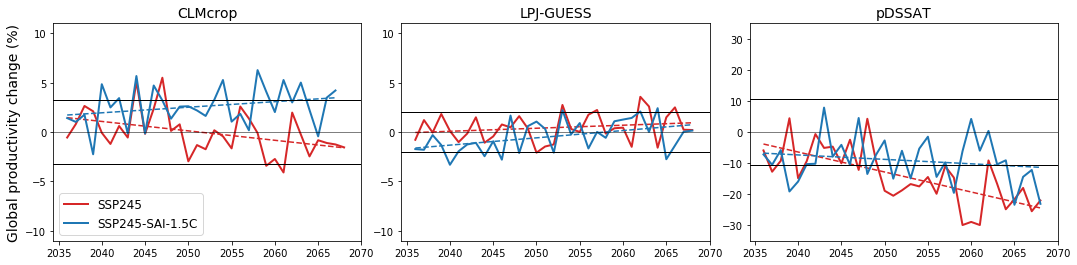

In [183]:
fig = plt.figure()
fig.set_size_inches(18,4)
ax1 = fig.add_subplot(131)
ax1.plot(time,CLMssp_pchange,linewidth=2,color='tab:red',label="SSP245")
ax1.plot(time, fit_function_CLMssp(x), linewidth=1.5, color='tab:red', linestyle='--')
ax1.plot(time_clm,CLMsai_pchange,linewidth=2,color='tab:blue',label="SSP245-SAI-1.5C")
ax1.plot(time_clm, fit_function_CLMsai(x_clm), linewidth=1.5, color='tab:blue', linestyle='--')
ax1.legend(loc="lower left", ncol=1, prop={'size': 12})
ax1.set_title('CLMcrop',size=14)
ax1.set_ylim([-11, 11])
#ax1.set_xticks(xticks)
ax1.set_yticks(np.arange(-10, 15, 5))
ax1.set_xticks(np.arange(2035, 2075, 5))
ax1.axhline(y=-3.2, color='k',linewidth=1)
ax1.axhline(y=3.2, color='k',linewidth=1)
ax1.axhline(y=0, color='k', linestyle='-',linewidth=0.5)
ax1.set_ylabel("Global productivity change (%)",fontsize=14)
#ax1.set_ylabel("Global Productivity (Mt/yr)",fontsize=12)

ax2 = fig.add_subplot(132)
ax2.plot(time,LPJssp_pchange,linewidth=2,color='tab:red',label="SSP245")
ax2.plot(time, fit_function_LPJssp(x), linewidth=1.5, color='tab:red', linestyle='--')
ax2.plot(time,LPJsai_pchange,linewidth=2,color='tab:blue',label="SSP245-SAI-1.5C")
ax2.plot(time, fit_function_LPJsai(x), linewidth=1.5, color='tab:blue', linestyle='--')
#ax2.legend(loc="upper right", ncol=1, prop={'size': 13})
ax2.set_title('LPJ-GUESS',size=14)
ax2.set_ylim([-11, 11])
ax2.set_yticks(np.arange(-10, 15, 5))
ax2.set_xticks(np.arange(2035, 2075, 5))
ax2.axhline(y=-2.0, color='k',linewidth=1)
ax2.axhline(y=2.0, color='k', linewidth=1)
ax2.axhline(y=0, color='k',linewidth=0.5)
#ax3.set_ylabel("Global Productivity (Mt/year)",fontsize=13)

ax3 = fig.add_subplot(133)
ax3.plot(time,DSATssp_sdif_pchange,linewidth=2,color='tab:red',label="SSP245")
ax3.plot(time, fit_function_DSATssp(x), linewidth=1.5, color='tab:red', linestyle='--')
ax3.plot(time,DSATsai_sdif_pchange,linewidth=2,color='tab:blue',label="SSP245-SAI-1.5C")
ax3.plot(time, fit_function_DSATsai(x), linewidth=1.5, color='tab:blue', linestyle='--')
#ax1.plot(time_sai,cornprod_pdssat_sai_sdif_sum,linewidth=2,color='k',label="SSP245-SAI-1.5C with diffuse")
#ax3.legend(loc="lower left", ncol=1, prop={'size': 11})
ax3.set_title('pDSSAT',size=14)
ax3.set_ylim([-35, 35])
ax3.set_xticks(np.arange(2035, 2075, 5))
ax3.axhline(y=-10.6, color='k',linewidth=1)
ax3.axhline(y=10.6, color='k',linewidth=1)
ax3.axhline(y=0, color='k', linestyle='-',linewidth=0.5)
#ax3.set_ylabel("Global Productivity (Mt/year)",fontsize=13)
plt.subplots_adjust(hspace=0.2,wspace=0.13)
#fig.suptitle('Percent change to maize productivity relative to reference period', size=14, y=0.999999999)
plt.savefig(savedir+'/Fig1_JJ.png', dpi = 600, bbox_inches = 'tight', pad_inches = 0.05 )